In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as d
import datetime
import pandas as pd

In [2]:
data = np.genfromtxt('/media/t/Bachelor/videos/29-03/log_vid_29-03-0818.csv', delimiter=',')
# data2 = np.genfromtxt('log_vid_1453.csv', delimiter=',')

# data = np.concatenate([data1, data2])

In [3]:
number_data_points = data.shape[0]

#start_date = datetime.datetime(year=2020, day=18, month=9, hour=15, minute=19, second=47)
start_date = datetime.datetime(year=2021, day=29, month=3, hour=8, minute=18, second=00)
end_date = start_date + datetime.timedelta(seconds=number_data_points / 60)
print(end_date)

2021-03-29 13:19:19.100000


In [4]:
# Group data
group_size = 3000
rest = number_data_points % group_size
all_in = data[..., 1][:-rest] if rest !=0 else data[..., 1]
all_out = data[..., 2][:-rest] if rest !=0 else data[..., 2]
in_ = np.sum(np.reshape(all_in, (-1, group_size)), axis=-1)
out_ = np.sum(np.reshape(all_out, (-1, group_size)), axis=-1)
time_list = [(start_date + i * datetime.timedelta(seconds=int(group_size // 60))) for i in range((number_data_points  - rest) // group_size)]

a [datetime.datetime(2021, 3, 29, 8, 18), datetime.datetime(2021, 3, 29, 8, 18, 50), datetime.datetime(2021, 3, 29, 8, 19, 40), datetime.datetime(2021, 3, 29, 8, 20, 30), datetime.datetime(2021, 3, 29, 8, 21, 20), datetime.datetime(2021, 3, 29, 8, 22, 10), datetime.datetime(2021, 3, 29, 8, 23), datetime.datetime(2021, 3, 29, 8, 23, 50), datetime.datetime(2021, 3, 29, 8, 24, 40), datetime.datetime(2021, 3, 29, 8, 25, 30), datetime.datetime(2021, 3, 29, 8, 26, 20), datetime.datetime(2021, 3, 29, 8, 27, 10), datetime.datetime(2021, 3, 29, 8, 28), datetime.datetime(2021, 3, 29, 8, 28, 50), datetime.datetime(2021, 3, 29, 8, 29, 40), datetime.datetime(2021, 3, 29, 8, 30, 30), datetime.datetime(2021, 3, 29, 8, 31, 20), datetime.datetime(2021, 3, 29, 8, 32, 10), datetime.datetime(2021, 3, 29, 8, 33), datetime.datetime(2021, 3, 29, 8, 33, 50), datetime.datetime(2021, 3, 29, 8, 34, 40), datetime.datetime(2021, 3, 29, 8, 35, 30), datetime.datetime(2021, 3, 29, 8, 36, 20), datetime.datetime(2021, 

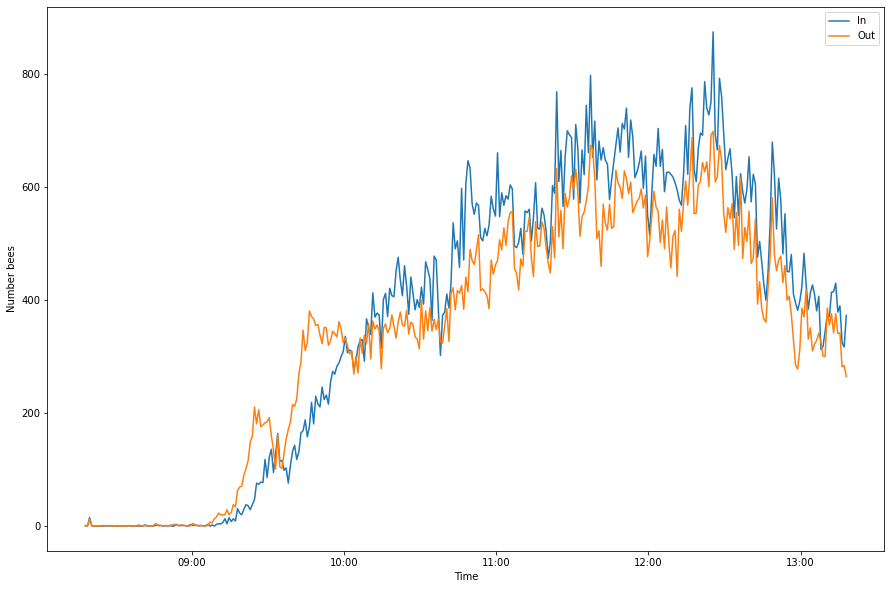

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(time_list, in_, label='In')
ax.plot(time_list, out_, label='Out')
ax.legend()
myFmt = d.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time")
ax.set_ylabel("Number bees")
fig.savefig("bee_count.png")

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(np.cumsum(in_), label='In')
ax.plot(np.cumsum(out_), label='Out')
ax.legend()

In [11]:
df = pd.read_csv("/media/t/Bachelor/videos/29-03/Wetterdaten--2021-03-29.csv", header=0, skiprows=[1, 2], delimiter=';')
print(df)
df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%y %H:%M')

              Datum Temperatur innen Luftfeuchte innen Luftdruck  \
0    29.03.21 00:00            20,90             37,00    990,00   
1    29.03.21 00:05            21,10             37,00    990,00   
2    29.03.21 00:10            21,00             37,00    990,00   
3    29.03.21 00:15            21,00             35,00    990,00   
4    29.03.21 00:20            20,80             35,00    990,00   
..              ...              ...               ...       ...   
258  29.03.21 21:30            21,10             37,00    992,00   
259  29.03.21 21:35            21,20             37,00    992,00   
260  29.03.21 21:40            21,30             37,00    992,00   
261  29.03.21 21:45            21,30             37,00    992,00   
262  29.03.21 21:50            21,30             37,00    993,00   

    Temperatur aussen Luftfeuchte aussen Niederschlag Windgeschwindigkeit  \
0                9,50              54,00         0,00                0,00   
1                9,80        

                  Datum Temperatur innen Luftfeuchte innen Luftdruck  \
0   2021-03-29 00:00:00            20,90             37,00    990,00   
1   2021-03-29 00:05:00            21,10             37,00    990,00   
2   2021-03-29 00:10:00            21,00             37,00    990,00   
3   2021-03-29 00:15:00            21,00             35,00    990,00   
4   2021-03-29 00:20:00            20,80             35,00    990,00   
..                  ...              ...               ...       ...   
258 2021-03-29 21:30:00            21,10             37,00    992,00   
259 2021-03-29 21:35:00            21,20             37,00    992,00   
260 2021-03-29 21:40:00            21,30             37,00    992,00   
261 2021-03-29 21:45:00            21,30             37,00    992,00   
262 2021-03-29 21:50:00            21,30             37,00    993,00   

    Temperatur aussen Luftfeuchte aussen Niederschlag Windgeschwindigkeit  \
0                9,50              54,00         0,00     

Text(0.5, 1.0, 'Windgeschwindigkeit')

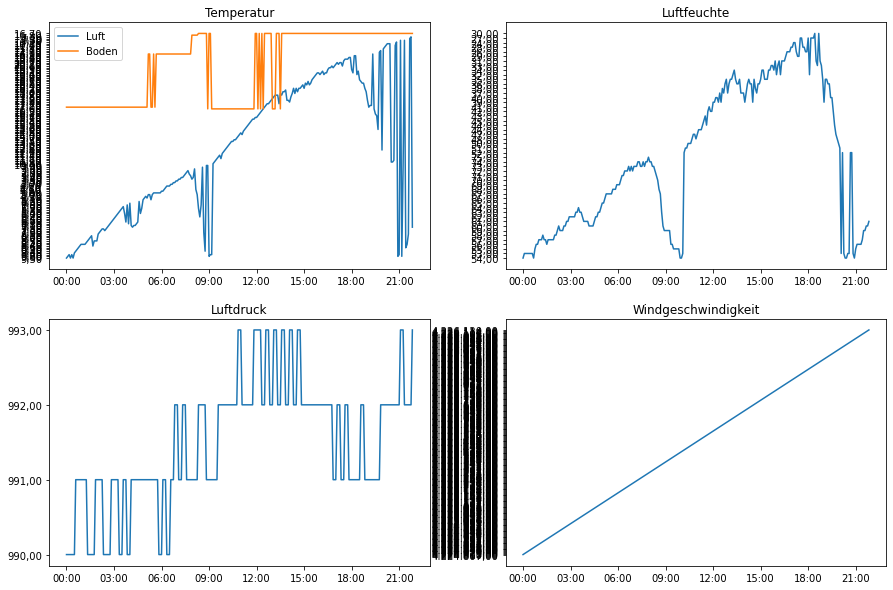

In [15]:
myFmt = d.DateFormatter('%H:%M')
t1 = df[(df['Datum'] >= datetime.datetime(day=29, month=3, year=2021, hour=8)) &
          (df['Datum'] < datetime.datetime(day=29, month=3, year=2021, hour=20))]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
print(t1)
ax[0,0].plot(t1['Datum'], t1['Temperatur aussen'], label="Luft")
ax[0,0].plot(t1['Datum'], t1['Boden'], label="Boden")
ax[0,0].legend()

ax[0,1].plot(t1['Datum'], t1['Luftfeuchte aussen'])
ax[1,0].plot(t1['Datum'], t1['Luftdruck'])
ax[1,1].plot(t1['Datum'], t1['Sonnenschein'])


ax[0, 0].xaxis.set_major_formatter(myFmt)
ax[0, 0].set_title("Temperatur")
ax[1, 0].xaxis.set_major_formatter(myFmt)
ax[1, 0].set_title("Luftdruck")
ax[0, 1].xaxis.set_major_formatter(myFmt)
ax[0, 1].set_title("Luftfeuchte")
ax[1, 1].xaxis.set_major_formatter(myFmt)
ax[1, 1].set_title("Windgeschwindigkeit")

In [20]:
df = pd.read_csv("/media/t/Bachelor/videos/29-03/temperature-29-03-21-08-15-39.csv")
df['Time']= pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Time'] = df['Time'].apply(lambda x: datetime.datetime.combine(datetime.date(2021, 3, 29), x))
weather = df[(df['Time'] >= start_date) &
          (df['Time'] < datetime.datetime(day=29, month=3, year=2021, hour=20, minute=0))]
print(weather)

                    Time  Temperature  Pressure
14   2021-03-29 08:18:00          5.7     99370
15   2021-03-29 08:18:10          5.7     99381
16   2021-03-29 08:18:20          5.7     99379
17   2021-03-29 08:18:30          5.8     99370
18   2021-03-29 08:18:40          5.8     99378
...                  ...          ...       ...
4206 2021-03-29 19:59:13         15.2     99432
4207 2021-03-29 19:59:23         15.2     99432
4208 2021-03-29 19:59:33         15.2     99428
4209 2021-03-29 19:59:43         15.2     99434
4210 2021-03-29 19:59:53         15.1     99432

[4197 rows x 3 columns]


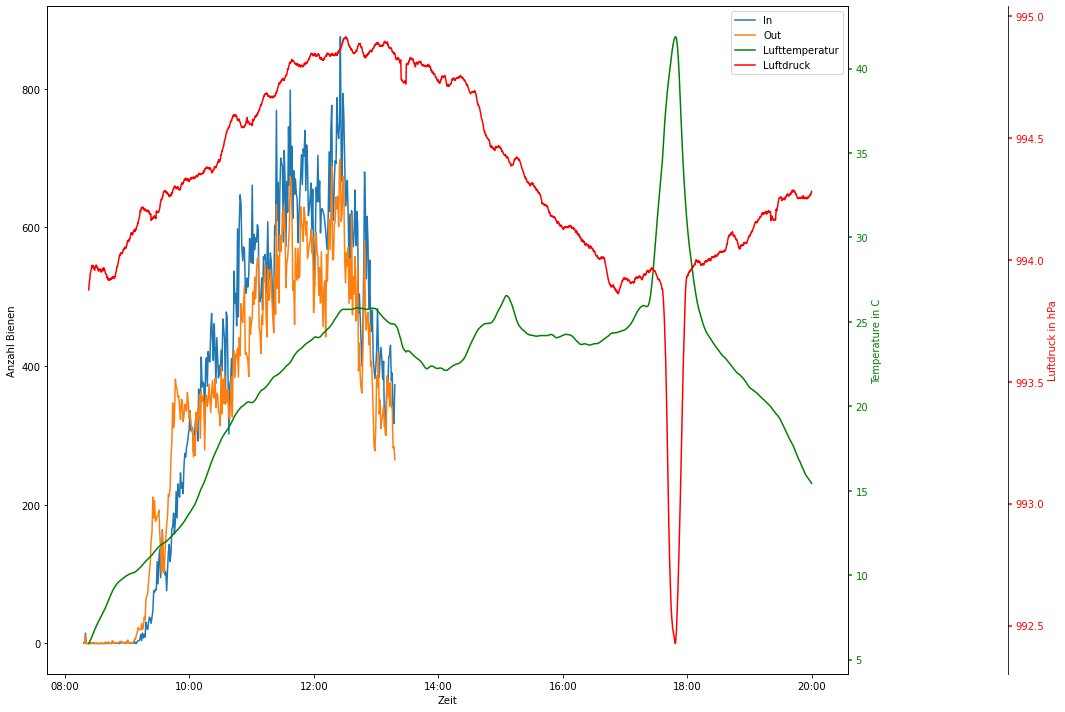

In [21]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, ax = plt.subplots(figsize=(15,10))
temp_ax = ax.twinx()
pre_ax = ax.twinx()

myFmt = d.DateFormatter('%H:%M')

pre_ax.spines["right"].set_position(("axes", 1.2))
make_patch_spines_invisible(pre_ax)
pre_ax.spines["right"].set_visible(True)

in_plt = ax.plot(time_list, in_, label='In')
out_plt = ax.plot(time_list, out_, label='Out')
ax.xaxis.set_major_formatter(myFmt)

temp_plt = temp_ax.plot(weather['Time'], weather['Temperature'].rolling(window=30).mean(), 'g-', label="Lufttemperatur")
pre_plt = pre_ax.plot(weather['Time'], weather['Pressure'].rolling(window=30).mean() / 100, 'r-', label="Luftdruck")
temp_ax.xaxis.set_major_formatter(myFmt)

ax.set_xlabel("Zeit")
ax.set_ylabel("Anzahl Bienen")
temp_ax.set_ylabel("Temperature in C")
pre_ax.set_ylabel("Luftdruck in hPa")

temp_ax.yaxis.label.set_color(temp_plt[0].get_color())
pre_ax.yaxis.label.set_color(pre_plt[0].get_color())
tkw = dict(size=4, width=1.5)
temp_ax.tick_params(axis='y', colors=temp_plt[0].get_color(), **tkw)
pre_ax.tick_params(axis='y', colors=pre_plt[0].get_color(), **tkw)

lines = [in_plt[0], out_plt[0], temp_plt[0], pre_plt[0]]
ax.legend(lines, [l.get_label() for l in lines])

fig.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(time_list, in_, label='In')
ax.plot(time_list, out_, label='Out')
ax.legend()
myFmt = d.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
ax.set_xlabel("Time")
ax.set_ylabel("Number bees")


temp_ax = ax.twinx()
temp_ax.plot(t1['Datum'], t1['Temperatur aussen'], label="Luft")
temp_ax.plot(t1['Datum'], t1['Boden'], label="Boden")
temp_ax.xaxis.set_major_formatter(myFmt)
temp_ax.tick_params(axis='y', labelcolor='white')
temp_ax.set_ylabel("Temperature in C")
temp_ax.legend()
fig.tight_layout()